# OIL Price Prediction

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('Crude Oil Prices Daily.xlsx')
data

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78


In [15]:
data.shape

(8223, 2)

In [16]:
data.dtypes

,0
Date,datetime64[ns]
Closing Value,float64


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


In [18]:
data.describe()

,Date,Closing Value
count,8223,8216.000000
mean,2002-04-05 22:11:15.082086912,43.492139
min,1986-01-02 00:00:00,10.250000
25%,1994-01-25 12:00:00,19.577500
50%,2002-04-02 00:00:00,29.610000
75%,2010-06-12 12:00:00,63.402500
max,2018-07-09 00:00:00,145.310000
std,NaN,29.616804


In [19]:
data.columns

Index(['Date', 'Closing Value'], dtype='object')

In [20]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')
data["Date"]


,Date
0,1986-01-02
1,1986-01-03
2,1986-01-06
3,1986-01-07
4,1986-01-08
...,...
8218,2018-07-03
8219,2018-07-04
8220,2018-07-05
8221,2018-07-06


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


In [22]:
# Check if there are any duplicate entries
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
data = data.drop_duplicates()


Number of duplicate rows: 0


In [23]:
# Sort data by date
data = data.sort_values(by='Date')

# Reset the index after sorting
data.reset_index(drop=True, inplace=True)

In [24]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Date             0
Closing Value    7
dtype: int64


In [25]:
# Replace missing values in 'Closing Value' column with the mean
mean_value = data['Closing Value'].mean()
data['Closing Value'].fillna(mean_value, inplace=True)

In [26]:
# Import necessary libraries
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Closing Value'].quantile(0.25)
Q3 = data['Closing Value'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Closing Value'] < lower_bound) | (data['Closing Value'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 34


In [27]:
# Remove outliers from the data
data_cleaned = data[(data['Closing Value'] >= lower_bound) & (data['Closing Value'] <= upper_bound)]

# Display the dataset after removing outliers
print(f"Number of rows after removing outliers: {len(data_cleaned)}")
print(data_cleaned.head())

Number of rows after removing outliers: 8189
        Date  Closing Value
0 1986-01-02          25.56
1 1986-01-03          26.00
2 1986-01-06          26.53
3 1986-01-07          25.85
4 1986-01-08          25.87


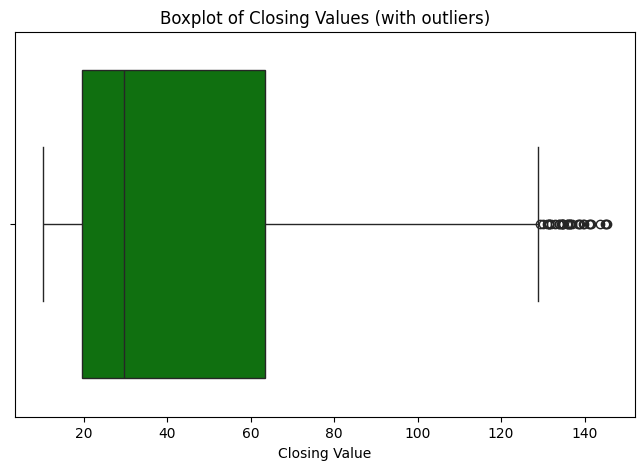

In [28]:
# Boxplot to visualize outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Closing Value'], color='green')
plt.title('Boxplot of Closing Values (with outliers)')
plt.show()


In [29]:
# Create time-based features from the 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Calculate the correlation matrix
correlation_matrix = data[['Closing Value', 'Year', 'Month', 'Day', 'DayOfWeek']].corr()

# Print the correlation matrix
print(correlation_matrix)


               Closing Value      Year     Month       Day  DayOfWeek
Closing Value       1.000000  0.754360  0.009994  0.003098   0.004726
Year                0.754360  1.000000 -0.021489 -0.000825   0.004665
Month               0.009994 -0.021489  1.000000 -0.005478  -0.013825
Day                 0.003098 -0.000825 -0.005478  1.000000  -0.003793
DayOfWeek           0.004726  0.004665 -0.013825 -0.003793   1.000000


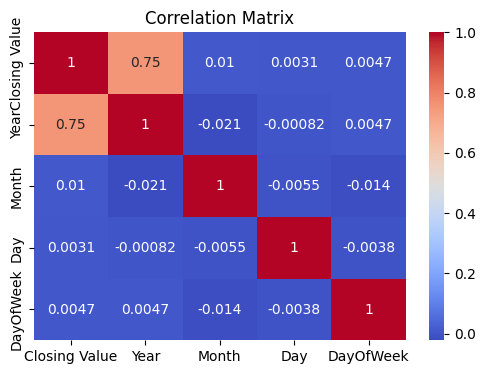

In [30]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

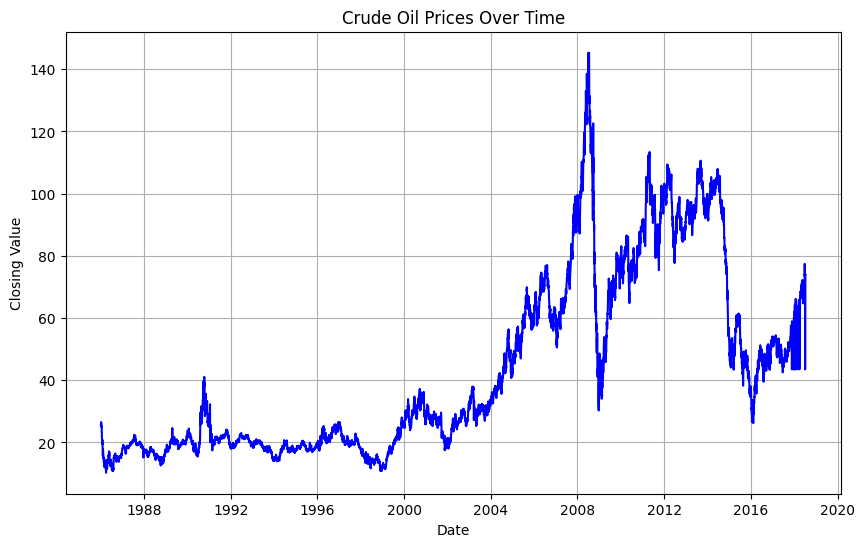

In [31]:
# Line plot of Closing Value over time
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Closing Value'], color='blue')
plt.title('Crude Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.grid(True)
plt.show()

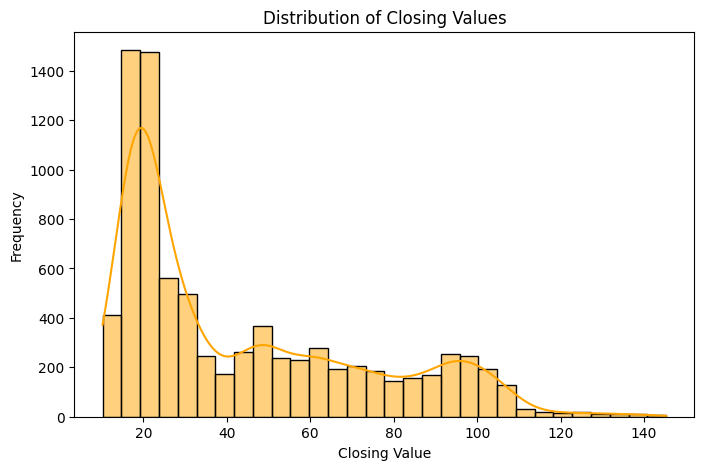

In [32]:
# Distribution plot of Closing Value
plt.figure(figsize=(8,5))
sns.histplot(data['Closing Value'], bins=30, color='orange', kde=True)
plt.title('Distribution of Closing Values')
plt.xlabel('Closing Value')
plt.ylabel('Frequency')
plt.show()


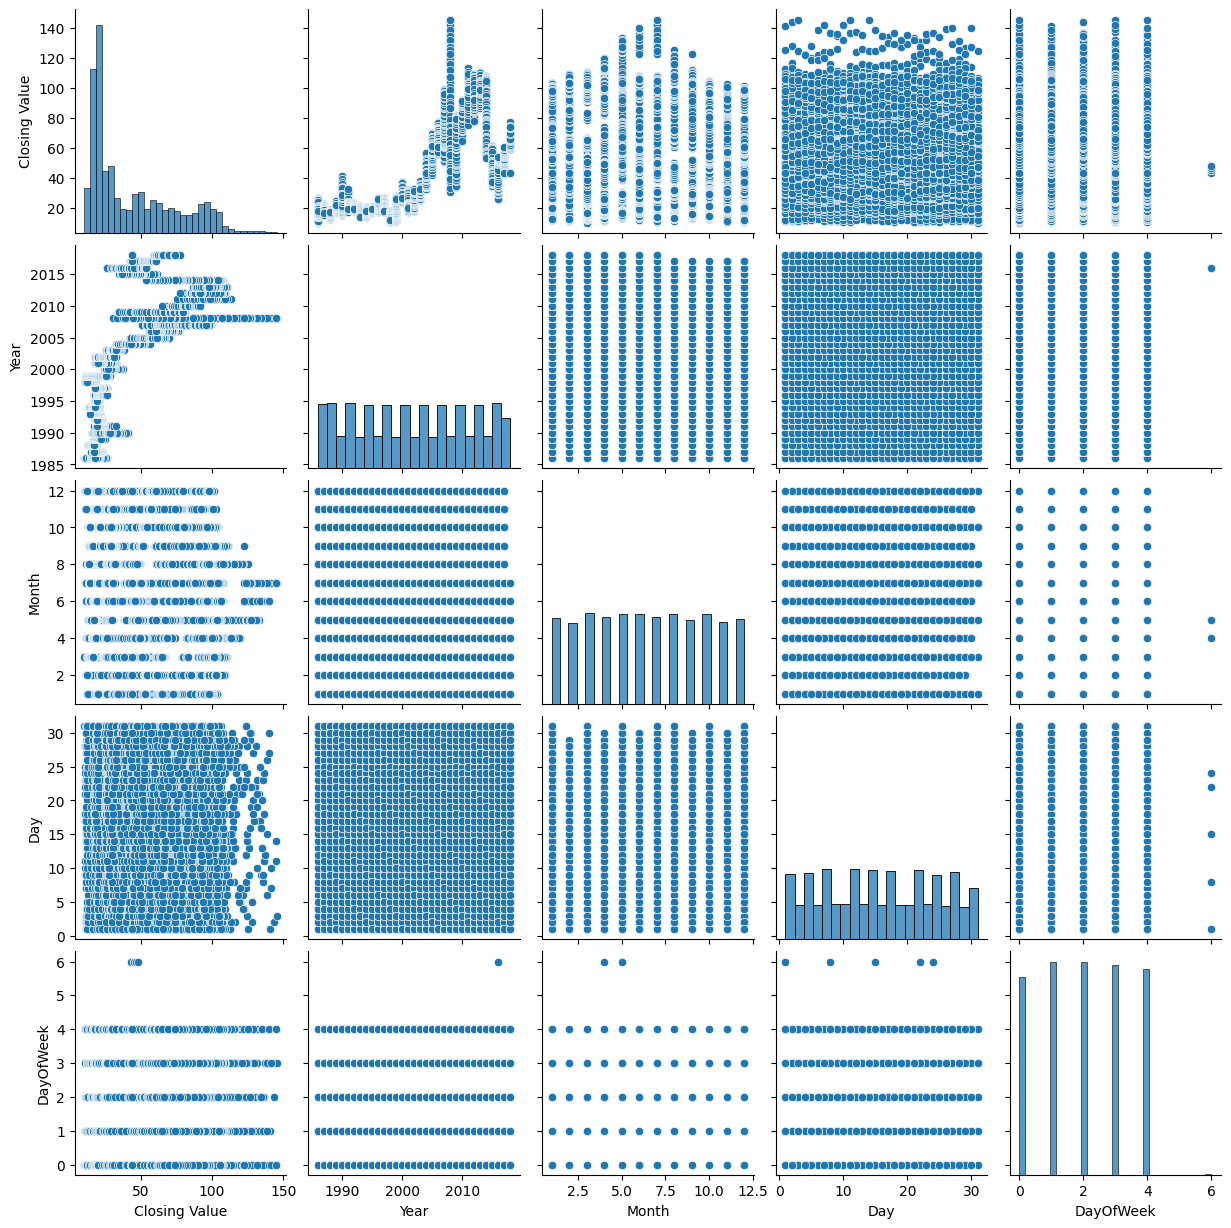

In [33]:
sns.pairplot(data)

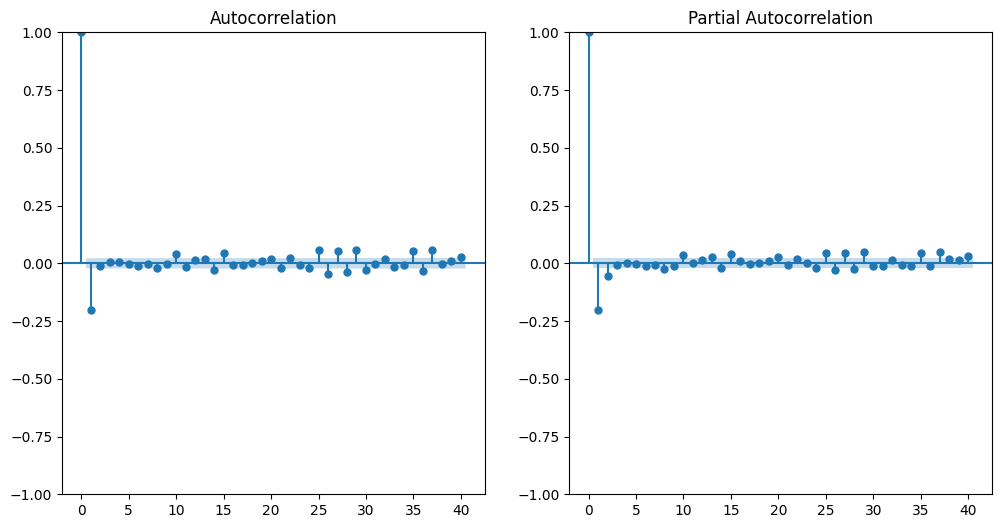

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Difference the data to make it stationary
data_diff = data['Closing Value'].diff().dropna()

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data_diff, ax=plt.gca())
plt.subplot(122)
plot_pacf(data_diff, ax=plt.gca())
plt.show()

In [35]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(data['Closing Value'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')



ADF Statistic: -2.0189110743381704
p-value: 0.27834330038335475


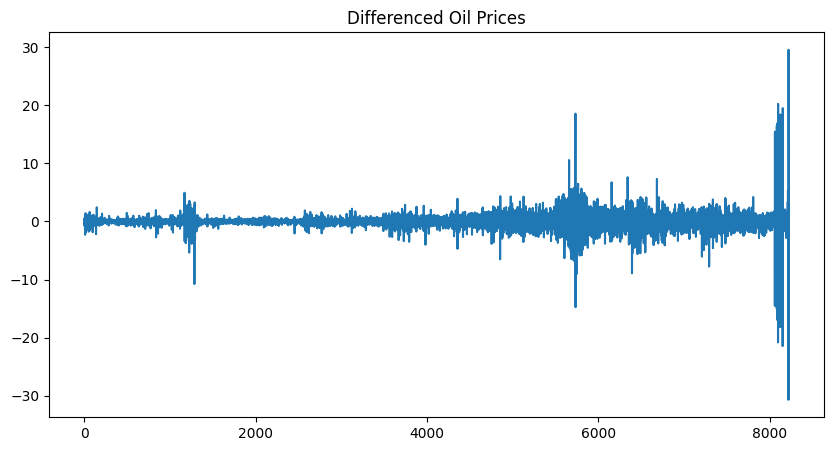

In [36]:
# If p-value > 0.05, the data is non-stationary, so we apply differencing
if result[1] > 0.05:
    data['Differenced'] = data['Closing Value'].diff().dropna()
else:
    data['Differenced'] = data['Closing Value']

plt.figure(figsize=(10,5))
plt.plot(data.index, data['Differenced'])
plt.title('Differenced Oil Prices')
plt.show()

In [37]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

# Set the parameters range
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Generate all possible combinations of p, d, and q
pdq_combinations = list(itertools.product(p, d, q))

# Suppress warnings
warnings.filterwarnings("ignore")

# Grid search for the best ARIMA model
best_score, best_pdq = float("inf"), None
for param in pdq_combinations:
    try:
        model = ARIMA(data['Closing Value'], order=param)
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(data)-30, end=len(data)-1)
        error = mean_squared_error(data['Closing Value'][-30:], predictions)
        if error < best_score:
            best_score = error
            best_pdq = param
        print(f'ARIMA{param} MSE={error}')
    except:
        continue

print(f'Best ARIMA parameters: {best_pdq} with MSE={best_score}')

ARIMA(0, 0, 0) MSE=635.5843877067225
ARIMA(0, 0, 1) MSE=304.532161813099
ARIMA(0, 0, 2) MSE=392.9823329996119
ARIMA(0, 0, 3) MSE=303.5775813676797
ARIMA(0, 1, 0) MSE=63.09972919647532
ARIMA(0, 1, 1) MSE=52.61864419969266
ARIMA(0, 1, 2) MSE=52.62570182976935
ARIMA(0, 1, 3) MSE=52.63798622498
ARIMA(1, 0, 0) MSE=63.04587839270908
ARIMA(1, 0, 1) MSE=52.61012682371136
ARIMA(1, 0, 2) MSE=52.61693386524628
ARIMA(1, 0, 3) MSE=52.629857279097415
ARIMA(1, 1, 0) MSE=53.59782711718299
ARIMA(1, 1, 1) MSE=52.62397542039786
ARIMA(1, 1, 2) MSE=52.640045446804805
ARIMA(1, 1, 3) MSE=52.63686805300244
ARIMA(2, 0, 0) MSE=53.583707993391414
ARIMA(2, 0, 1) MSE=52.61616436205879
ARIMA(2, 0, 2) MSE=52.63155102278147
ARIMA(2, 0, 3) MSE=52.62648228041594
ARIMA(2, 1, 0) MSE=52.70236222182254
ARIMA(2, 1, 1) MSE=52.63086483339297
ARIMA(2, 1, 2) MSE=52.635314192850075
ARIMA(2, 1, 3) MSE=52.64349792249959
ARIMA(3, 0, 0) MSE=52.69551265190834
ARIMA(3, 0, 1) MSE=52.70738358787394
ARIMA(3, 0, 2) MSE=52.625574487471845


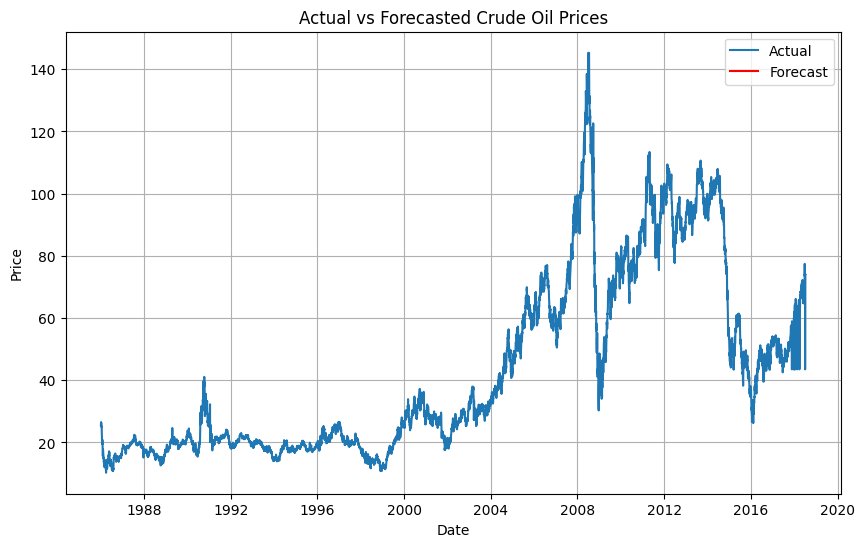

In [38]:
# Fit the ARIMA model with the best parameters
best_model = ARIMA(data['Closing Value'], order=best_pdq)
best_model_fit = best_model.fit()

# Forecasting the next 30 days
forecast = best_model_fit.forecast(steps=30)

# Create a new DataFrame for the predicted values
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=data['Date'].iloc[-1], periods=30, freq='D'), columns=['Forecast'])

# Plot actual vs forecasted values
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Closing Value'], label='Actual')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.title('Actual vs Forecasted Crude Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Train set shape: (6578, 7)
Test set shape: (1645, 7)


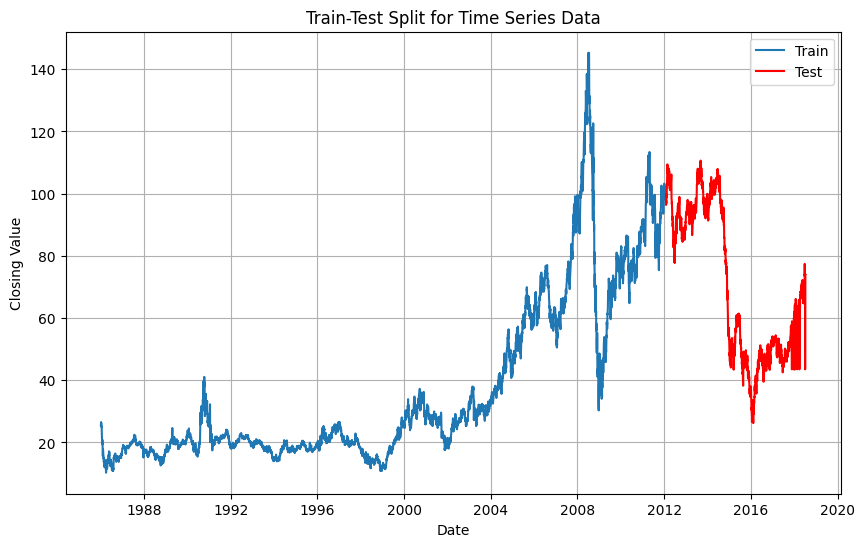

In [39]:
# Define the train-test split ratio (e.g., 80% for train, 20% for test)
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

# Split the data into training and testing sets
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Display the shapes of train and test sets
print(f'Train set shape: {train.shape}')
print(f'Test set shape: {test.shape}')

# Plot the train and test sets
plt.figure(figsize=(10,6))
plt.plot(train['Date'], train['Closing Value'], label='Train')
plt.plot(test['Date'], test['Closing Value'], label='Test', color='red')
plt.title('Train-Test Split for Time Series Data')
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
# Fit ARIMA model on training data
# You can choose ARIMA(p,d,q) values from the earlier hyperparameter tuning or test different values here
p, d, q = 3, 0, 3  # Example values; replace these with optimal ones from hyperparameter tuning

# Fit the ARIMA model on the training data
arima_model = ARIMA(train['Closing Value'], order=(p, d, q))
arima_result = arima_model.fit()

# Print model summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:          Closing Value   No. Observations:                 6578
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -10048.054
Date:                Tue, 01 Oct 2024   AIC                          20112.108
Time:                        15:34:35   BIC                          20166.440
Sample:                             0   HQIC                         20130.889
                               - 6578                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.7875    215.037      0.171      0.864    -384.676     458.251
ar.L1          0.0728      0.043      1.711      0.087      -0.011       0.156
ar.L2          0.1806      0.038      4.779      0.0

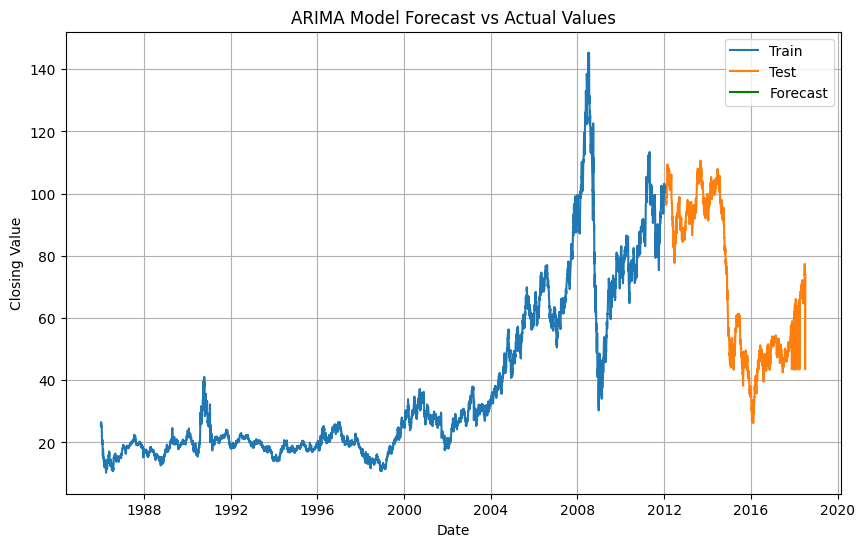

In [41]:
# Forecast the number of steps equal to the length of the test set
forecast = arima_result.forecast(steps=len(test))

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecast, index=test.index, columns=['Forecast'])

# Compare the forecasted values with the actual test values
plt.figure(figsize=(10,6))
plt.plot(train['Date'], train['Closing Value'], label='Train')
plt.plot(test['Date'], test['Closing Value'], label='Test')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='green')
plt.title('ARIMA Model Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
# Import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the evaluation metrics
mae = mean_absolute_error(test['Closing Value'], forecast)
mse = mean_squared_error(test['Closing Value'], forecast)
rmse_arima = np.sqrt(mse)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse_arima}')


Mean Absolute Error (MAE): 27.614434223918035
Mean Squared Error (MSE): 1170.0681116187252
Root Mean Squared Error (RMSE): 34.20625836917457


In [43]:
# Import necessary libraries
import itertools
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define parameter ranges for alpha, beta, and gamma
alpha_values = [0.1, 0.2, 0.5, 0.8]   # Level smoothing
beta_values = [0.1, 0.2, 0.5, 0.8]    # Trend smoothing
gamma_values = [0.1, 0.2, 0.5, 0.8]   # Seasonal smoothing

# Define the trend and seasonal type, here we applied additive method
trend_type = 'add'     # 'add' for additive trend, 'mul' for multiplicative
seasonal_type = 'add'  # 'add' for additive seasonality, 'mul' for multiplicative
seasonal_periods = 12  # Number of periods in the seasonal cycle (monthly data)


In [44]:
# Function to perform grid search for Exponential Smoothing
def optimize_exponential_smoothing(data, alpha_values, beta_values, gamma_values, trend, seasonal, seasonal_periods):
    best_aic = float("inf")
    best_model = None
    best_params = None

    # Generate all combinations of alpha, beta, gamma
    param_combinations = itertools.product(alpha_values, beta_values, gamma_values)

    for alpha, beta, gamma in param_combinations:
        try:
            # Fit the Exponential Smoothing model with current parameters
            model = ExponentialSmoothing(data['Closing Value'],
                                         trend=trend,
                                         seasonal=seasonal,
                                         seasonal_periods=seasonal_periods)

            fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

            # Calculate AIC and check if it is the best model
            aic = fitted_model.aic
            print(f'alpha={alpha}, beta={beta}, gamma={gamma}, AIC={aic}')

            if aic < best_aic:
                best_aic = aic
                best_model = fitted_model
                best_params = (alpha, beta, gamma)

        except Exception as e:
            print(f"Model failed for alpha={alpha}, beta={beta}, gamma={gamma} due to {e}")
            continue

    print(f'\nBest AIC: {best_aic}')
    print(f'Best Parameters: alpha={best_params[0]}, beta={best_params[1]}, gamma={best_params[2]}')
    return best_model

# Perform the grid search
best_model = optimize_exponential_smoothing(data, alpha_values, beta_values, gamma_values, trend_type, seasonal_type, seasonal_periods)


alpha=0.1, beta=0.1, gamma=0.1, AIC=14477.482699243184
alpha=0.1, beta=0.1, gamma=0.2, AIC=14537.928262451664
alpha=0.1, beta=0.1, gamma=0.5, AIC=15096.273113087726
alpha=0.1, beta=0.1, gamma=0.8, AIC=16284.913492248244
alpha=0.1, beta=0.2, gamma=0.1, AIC=14959.185062767163
alpha=0.1, beta=0.2, gamma=0.2, AIC=15046.509814435682
alpha=0.1, beta=0.2, gamma=0.5, AIC=15759.12084291968
alpha=0.1, beta=0.2, gamma=0.8, AIC=17344.722203255355
alpha=0.1, beta=0.5, gamma=0.1, AIC=15388.447747287772
alpha=0.1, beta=0.5, gamma=0.2, AIC=15839.780537553992
alpha=0.1, beta=0.5, gamma=0.5, AIC=18206.640324775366
alpha=0.1, beta=0.5, gamma=0.8, AIC=23493.99851897789
alpha=0.1, beta=0.8, gamma=0.1, AIC=16569.675059985882
alpha=0.1, beta=0.8, gamma=0.2, AIC=17618.922047788903
alpha=0.1, beta=0.8, gamma=0.5, AIC=23145.133744567673
alpha=0.1, beta=0.8, gamma=0.8, AIC=nan
alpha=0.2, beta=0.1, gamma=0.1, AIC=10693.541460006329
alpha=0.2, beta=0.1, gamma=0.2, AIC=11008.278704914315
alpha=0.2, beta=0.1, gamma=

In [45]:
# Define the train-test split ratio (e.g., 80% train, 20% test)
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

# Split the data into training and testing sets
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Display the shapes of train and test sets
print(f'Train set shape: {train.shape}')
print(f'Test set shape: {test.shape}')


Train set shape: (6578, 7)
Test set shape: (1645, 7)


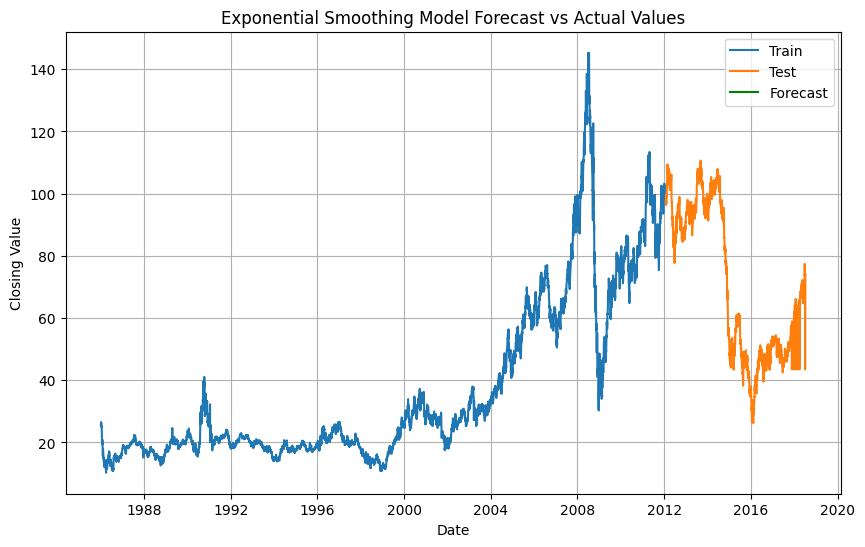

In [46]:
# Forecast the test period (same length as the test set)
forecast = best_model.forecast(steps=len(test))

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecast, index=test.index, columns=['Forecast'])

# Plot actual vs forecasted values
plt.figure(figsize=(10,6))
plt.plot(train['Date'], train['Closing Value'], label='Train')
plt.plot(test['Date'], test['Closing Value'], label='Test')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='green')
plt.title('Exponential Smoothing Model Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
# Calculate RMSE between actual and forecasted values
rmse_exponential_smoothing = np.sqrt(mean_squared_error(test['Closing Value'], forecast))

# Print RMSE value
print(f'Root Mean Squared Error (RMSE): {rmse_exponential_smoothing}')


Root Mean Squared Error (RMSE): 447.1959279639804


In [48]:
train_data = data.head(147)
test_data = data.tail(12)

In [49]:
# Import the necessary module
import statsmodels.formula.api as smf

# Rename the column to avoid spaces
train_data = train_data.rename(columns={'Closing Value': 'ClosingValue'})
test_data = test_data.rename(columns={'Closing Value': 'ClosingValue'})

# Fit the linear model using the renamed column
linear_model = smf.ols('ClosingValue ~ Year + Month', data=train_data).fit()

# Predict and calculate RMSE
pred_linear = pd.Series(linear_model.predict(test_data[['Year', 'Month']]))
rmse_linear = np.sqrt(np.mean((np.array(test_data['ClosingValue']) - np.array(pred_linear)) ** 2))

print("RMSE of the Linear Model:", rmse_linear)

RMSE of the Linear Model: 59.51733259392608


In [50]:
train_data['LogClosingValue'] = np.log(train_data['ClosingValue'])

# Fit the linear model on the logged target
exp_model = smf.ols('LogClosingValue ~ Year + Month', data=train_data).fit()

# Generate predictions for the test set
log_pred = exp_model.predict(test_data[['Year', 'Month']])

# Exponentiate the predictions to get back to the original scale
pred_exponential = np.exp(log_pred)

# Calculate RMSE
rmse_exponential = np.sqrt(np.mean((test_data['ClosingValue'] - pred_exponential) ** 2))

# Output the RMSE
print("RMSE of the Exponential Model:", rmse_exponential)

RMSE of the Exponential Model: 58.97329070309475


In [51]:
# Fit the quadratic model (including Month squared)
quadratic_model = smf.ols('ClosingValue ~ Year + Month + I(Month ** 2)', data=train_data).fit()

# Generate predictions for the test set
pred_quadratic = quadratic_model.predict(test_data[['Year', 'Month']])

# Calculate RMSE
rmse_quadratic = np.sqrt(np.mean((test_data['ClosingValue'] - pred_quadratic) ** 2))

# Output the RMSE
print("RMSE of the Quadratic Model:", rmse_quadratic)

RMSE of the Quadratic Model: 58.404827619140576


In [52]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

# Assuming your dataset has 'Year', 'Month', and 'ClosingValue' columns
# Ensure 'Month' is treated as a categorical variable to capture seasonality
train_data['Month'] = train_data['Month'].astype('category')
test_data['Month'] = test_data['Month'].astype('category')

# Fit the quadratic model with additive seasonality using Month as a categorical variable
additive_seasonal_model = smf.ols('ClosingValue ~ Year + I(Year ** 2) + C(Month)', data=train_data).fit()

# Generate predictions for the test set
pred_additive_seasonal = additive_seasonal_model.predict(test_data)

# Calculate RMSE
rmse_additive_seasonal = np.sqrt(mean_squared_error(test_data['ClosingValue'], pred_additive_seasonal))

# Output the RMSE
print("RMSE of the Additive Seasonal Model:", rmse_additive_seasonal)

# Optional: Show model summary
print(additive_seasonal_model.summary())

RMSE of the Additive Seasonal Model: 58.307753175470175
                            OLS Regression Results                            
Dep. Variable:           ClosingValue   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     168.7
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           1.64e-61
Time:                        15:34:55   Log-Likelihood:                -251.77
No. Observations:                 147   AIC:                             517.5
Df Residuals:                     140   BIC:                             538.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [53]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

# Assuming your dataset has 'Year', 'Month', and 'ClosingValue' columns
# Ensure 'Month' is treated as a categorical variable
train_data['Month'] = train_data['Month'].astype('category')
test_data['Month'] = test_data['Month'].astype('category')

# Fit the additive seasonality quadratic model
additive_seasonal_quadratic_model = smf.ols('ClosingValue ~ Year + I(Year ** 2) + C(Month)', data=train_data).fit()

# Generate predictions for the test set
pred_additive_seasonal_quadratic = additive_seasonal_quadratic_model.predict(test_data)

# Calculate RMSE
rmse_additive_seasonal_quadratic = np.sqrt(mean_squared_error(test_data['ClosingValue'], pred_additive_seasonal_quadratic))

# Output the RMSE
print("RMSE of the Additive Seasonality Quadratic Model:", rmse_additive_seasonal_quadratic)

# Optional: Show model summary
print(additive_seasonal_quadratic_model.summary())


RMSE of the Additive Seasonality Quadratic Model: 58.307753175470175
                            OLS Regression Results                            
Dep. Variable:           ClosingValue   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     168.7
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           1.64e-61
Time:                        15:34:55   Log-Likelihood:                -251.77
No. Observations:                 147   AIC:                             517.5
Df Residuals:                     140   BIC:                             538.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [54]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

# Ensure that 'Month' is treated as a categorical variable
train_data['Month'] = train_data['Month'].astype('category')
test_data['Month'] = test_data['Month'].astype('category')

# Apply a log transformation to the dependent variable (ClosingValue)
train_data['Log_ClosingValue'] = np.log(train_data['ClosingValue'])
test_data['Log_ClosingValue'] = np.log(test_data['ClosingValue'])

# Fit the multiplicative model (log-transformed dependent variable)
multiplicative_seasonal_model = smf.ols('Log_ClosingValue ~ Year + I(Year ** 2) + C(Month)', data=train_data).fit()

# Generate predictions for the test set (on the log scale)
log_pred_multiplicative_seasonal = multiplicative_seasonal_model.predict(test_data)

# Revert the predictions back to the original scale by applying the exponential
pred_multiplicative_seasonal = np.exp(log_pred_multiplicative_seasonal)

# Calculate RMSE (using the original scale)
rmse_multiplicative_seasonal = np.sqrt(mean_squared_error(test_data['ClosingValue'], pred_multiplicative_seasonal))

# Output the RMSE
print("RMSE of the Multiplicative Seasonal Model:", rmse_multiplicative_seasonal)

# Optional: Show model summary
print(multiplicative_seasonal_model.summary())


RMSE of the Multiplicative Seasonal Model: 57.735868686209436
                            OLS Regression Results                            
Dep. Variable:       Log_ClosingValue   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     181.8
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           1.66e-63
Time:                        15:34:55   Log-Likelihood:                 170.42
No. Observations:                 147   AIC:                            -326.8
Df Residuals:                     140   BIC:                            -305.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [55]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

# Ensure 'Month' is treated as a categorical variable
train_data['Month'] = train_data['Month'].astype('category')
test_data['Month'] = test_data['Month'].astype('category')

# Apply a log transformation to the dependent variable (ClosingValue)
train_data['Log_ClosingValue'] = np.log(train_data['ClosingValue'])
test_data['Log_ClosingValue'] = np.log(test_data['ClosingValue'])

# Fit the multiplicative additive seasonal model (log-transformed dependent variable)
multiplicative_additive_seasonal_model = smf.ols('Log_ClosingValue ~ Year + I(Year ** 2) + C(Month)', data=train_data).fit()

# Generate predictions for the test set (on the log scale)
log_pred_multiplicative_additive = multiplicative_additive_seasonal_model.predict(test_data)

# Revert the predictions back to the original scale by applying the exponential
pred_multiplicative_additive = np.exp(log_pred_multiplicative_additive)

# Calculate RMSE (on the original scale)
rmse_multiplicative_additive = np.sqrt(mean_squared_error(test_data['ClosingValue'], pred_multiplicative_additive))

# Output the RMSE
print("RMSE of the Multiplicative Additive Seasonal Model:", rmse_multiplicative_additive)

# Optional: Show model summary
print(multiplicative_additive_seasonal_model.summary())


RMSE of the Multiplicative Additive Seasonal Model: 57.735868686209436
                            OLS Regression Results                            
Dep. Variable:       Log_ClosingValue   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     181.8
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           1.66e-63
Time:                        15:34:55   Log-Likelihood:                 170.42
No. Observations:                 147   AIC:                            -326.8
Df Residuals:                     140   BIC:                            -305.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [56]:
#!pip install pystan

In [59]:
pip install streamlit


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1segnkgj/bk_f3vel.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1segnkgj/bb2splbj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85119', 'data', 'file=/tmp/tmp1segnkgj/bk_f3vel.json', 'init=/tmp/tmp1segnkgj/bb2splbj.json', 'output', 'file=/tmp/tmp1segnkgj/prophet_model8wk59aab/prophet_model-20241001153501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:35:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:35:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


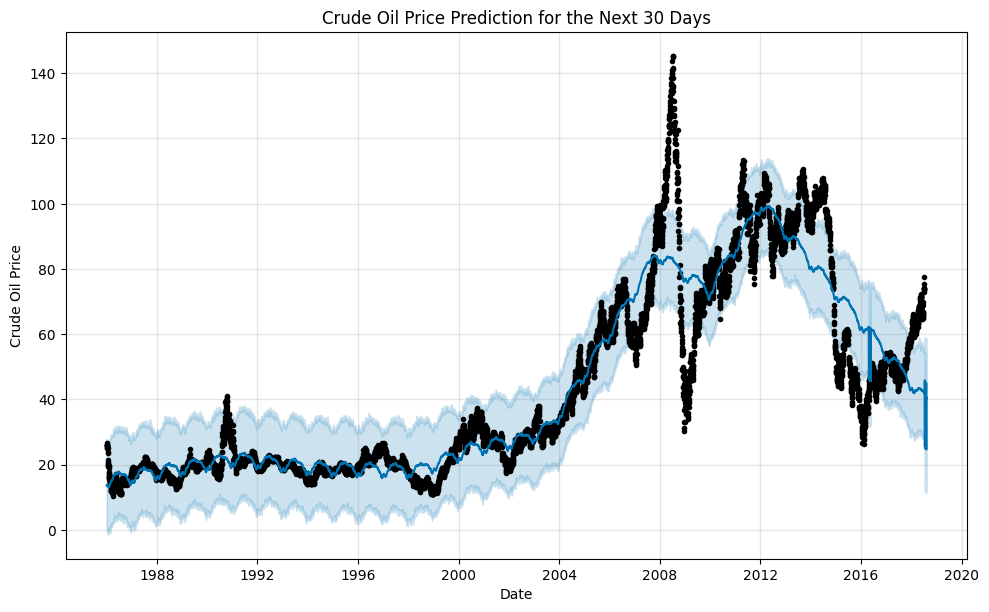

,ds,y,Predicted Closing Value
8206,2018-06-25,69.91,42.516426
8207,2018-06-26,75.23,42.424939
8208,2018-06-27,77.41,42.414087
8209,2018-06-28,73.45,42.524739
8210,2018-06-29,74.13,42.474644
8211,2018-07-02,73.89,42.317760
8212,2018-07-03,74.19,42.190265
8213,2018-07-05,73.05,42.218840
8214,2018-07-06,73.78,42.134947
8215,2018-07-09,73.93,41.891696


In [60]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Crude Oil Prices Daily.xlsx'
df = pd.read_excel(file_path)
df.dropna(subset=['Closing Value'], inplace=True)

# Prepare data for Prophet (rename columns)
df.rename(columns={'Date': 'ds', 'Closing Value': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])  # Ensure the date column is in datetime format

# Fit the Prophet model
model = Prophet()
model.fit(df)

# Create a dataframe for future dates (next 30 days)
future = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future)

# Include forecasted data in the original dataframe
df_forecast = forecast[['ds', 'yhat']].rename(columns={'yhat': 'Predicted Closing Value'})

# Merge original and forecasted data, including the predicted y values
df_combined = pd.merge(df, df_forecast, on='ds', how='outer')

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price Prediction for the Next 30 Days')
plt.show()

# Display the combined dataframe with actual closing values and predicted values
df_combined.tail(40)  # Display last 40 rows to include predictions


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1segnkgj/uldduf8v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1segnkgj/j2mdp4_d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82877', 'data', 'file=/tmp/tmp1segnkgj/uldduf8v.json', 'init=/tmp/tmp1segnkgj/j2mdp4_d.json', 'output', 'file=/tmp/tmp1segnkgj/prophet_model70z4xjo7/prophet_model-20241001153509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:35:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:35:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


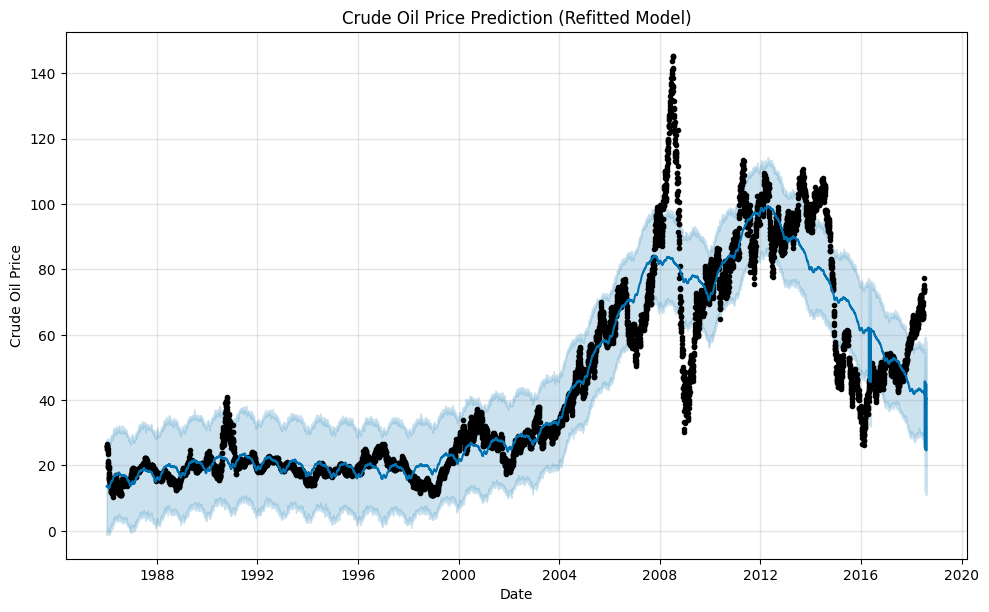

,ds,yhat
8216,2018-07-10,41.742220
8217,2018-07-11,41.677501
8218,2018-07-12,41.739396
8219,2018-07-13,41.646517
8220,2018-07-14,45.804605
8221,2018-07-15,25.413411
8222,2018-07-16,41.403461
8223,2018-07-17,41.262560
8224,2018-07-18,41.210151
8225,2018-07-19,41.287653


In [61]:
# Extract actual data (without predicted values)
df_actual = df_combined[['ds', 'y']].dropna()  # Remove any rows where 'y' is NaN (predicted data)

# Fit the Prophet model again, but only on actual data
model_refit = Prophet()
model_refit.fit(df_actual)

# Create future dataframe for another 30 days forecast (or extend further)
future_refit = model_refit.make_future_dataframe(periods=30)

# Make new predictions based on refitted model
forecast_refit = model_refit.predict(future_refit)

# Plot the refitted model's forecast
fig = model_refit.plot(forecast_refit)
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price Prediction (Refitted Model)')
plt.show()

# Display refitted forecast results
forecast_refit[['ds', 'yhat']].tail(30)  # Show predictions for the next 30 days


In [62]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Merge the actual and predicted values
df_actual_vs_pred = pd.merge(df_actual, forecast[['ds', 'yhat']], on='ds', how='inner')

# Calculate RMSE
rmse_prophet = np.sqrt(mean_squared_error(df_actual_vs_pred['y'], df_actual_vs_pred['yhat']))

print(f'RMSE: {rmse_prophet}')


RMSE: 10.669855463454182


In [63]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exponential","rmse_quadratic","rmse_additive_seasonal_quadratic","rmse_add_sea_quad","rmse_multiplicative_seasonal","rmse_multiplicative_additive","rmse_exponential_smoothing","rmse_arima","rmse_prophet"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exponential,rmse_quadratic,rmse_additive_seasonal,rmse_additive_seasonal_quadratic,rmse_multiplicative_seasonal,rmse_multiplicative_additive,rmse_exponential_smoothing,rmse_arima,rmse_prophet])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
9,rmse_prophet,10.669855
8,rmse_arima,34.206258
5,rmse_multiplicative_seasonal,57.735869
6,rmse_multiplicative_additive,57.735869
3,rmse_additive_seasonal_quadratic,58.307753
4,rmse_add_sea_quad,58.307753
2,rmse_quadratic,58.404828
1,rmse_exponential,58.973291
0,rmse_linear,59.517333
7,rmse_exponential_smoothing,447.195928


In [65]:
import joblib

joblib.dump(model_refit,"prophet_refitted_model.pkl")

['prophet_refitted_model.pkl']